In [1]:
from leafcutter_ants_fungi_mutualism.model import LeafcutterAntsFungiMutualismModel, track_ants, track_leaves, track_ratio_foragers
from mesa.batchrunner import BatchRunner, BatchRunnerMP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
model = LeafcutterAntsFungiMutualismModel()

max_steps = 10000
repetitions = 10

model_reporters = {"Ants_Biomass": track_ants,
                    "Fungus_Biomass": lambda m: m.fungus.biomass,
                    "Fraction forager ants": track_ratio_foragers,
}

# fixed_parameters = {'collect_data': True,
#                      'width': 50,
#                      'height': 50,
#                      'num_ants': 50,
#                      'num_plants': 150, 
#                      'pheromone_lifespan': 30,
#                      'num_plant_leaves': 100,
#                      'initial_foragers_ratio': 0.5, 
#                      'leaf_regrowth_rate': 1,
#                      'ant_death_probability': 0.001,
#                      'initial_fungus_energy': 50,
#                      'fungus_decay_rate': 0.005, 
#                      'energy_biomass_cvn': 2.0, 
#                      'fungus_larvae_cvn': 1.4,
#                      'energy_per_offspring': 1.0,
#                      'fungus_biomass_death_threshold': 5,
#                      'max_fitness_queue_size': 10,
#                      'caretaker_carrying_amount': 1,
#                      'caretaker_roundtrip_mean': 5.0, 
#                      'caretaker_roundtrip_std': 5.0,
#                      #'dormant_roundtrip_mean': 60.0,
# }

batch = BatchRunnerMP(LeafcutterAntsFungiMutualismModel, nr_processes=2,
                        max_steps=max_steps,
                        iterations=repetitions,
                        model_reporters=model_reporters,
                        display_progress=True,
                        #fixed_parameters=fixed_parameters,
                         variable_parameters= {'dormant_roundtrip_mean':[60.0]})

batch.run_all()

data = batch.get_collector_model()

10it [10:32, 63.24s/it]


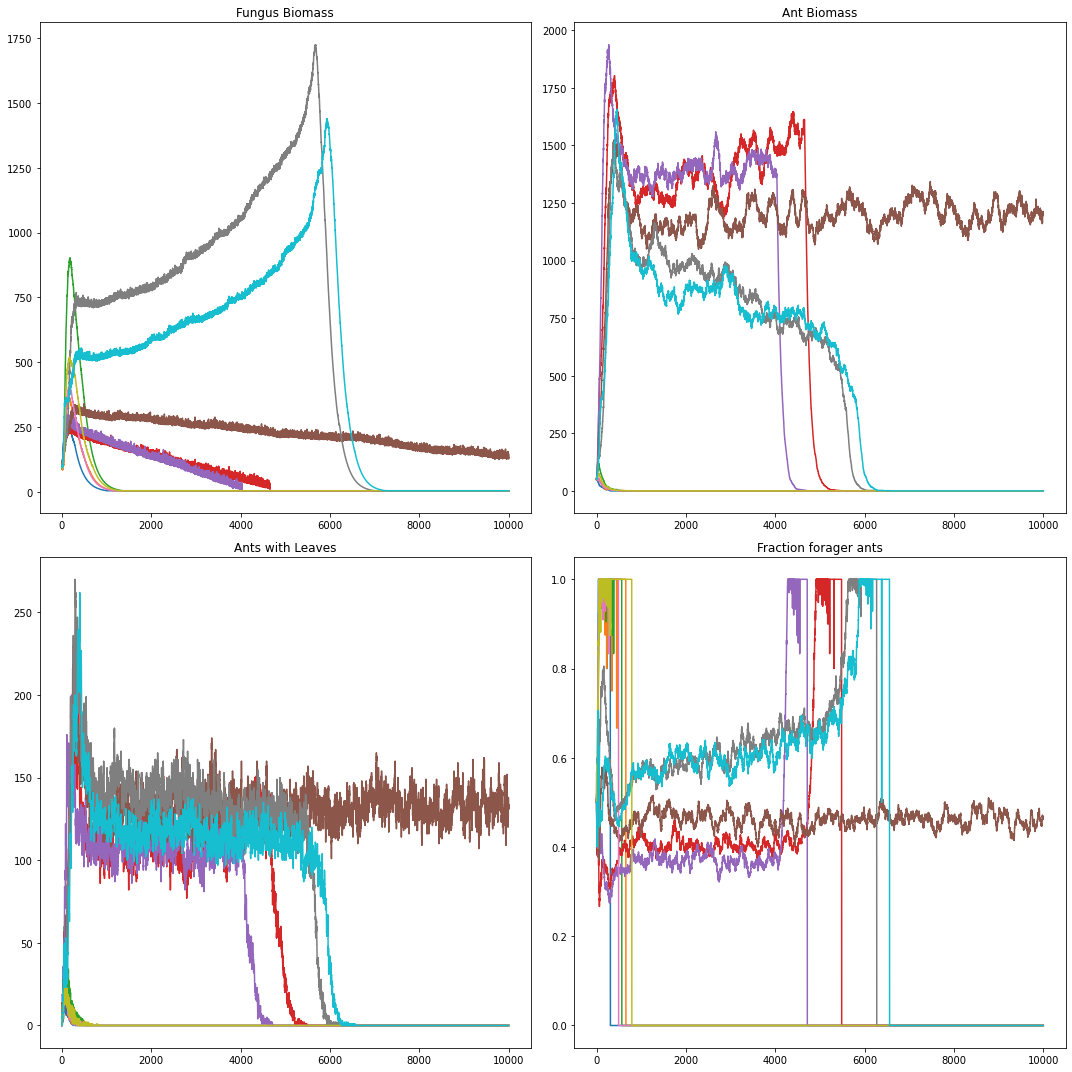

In [19]:
fig, axs = plt.subplots(2,2, figsize=(15,15))

time = [t for t in range(max_steps+1)]
for key in data.keys():
    df = data[key]
    axs[0,0].plot(time, df['Fungus Biomass'])
    axs[0,1].plot(time, df['Ant Biomass'])
    axs[1,0].plot(time, df['Ants with Leaves'])
    axs[1,1].plot(time, df['Fraction forager ants'])
    
axs[0,0].set_title('Fungus Biomass')
axs[0,1].set_title('Ant Biomass')
axs[1,0].set_title('Ants with Leaves')
axs[1,1].set_title('Fraction forager ants')
    
#     axs[0,0].set_ylim(4,5)
#     axs[0,0].set_xlim(0,500)

fig.tight_layout()
plt.show()

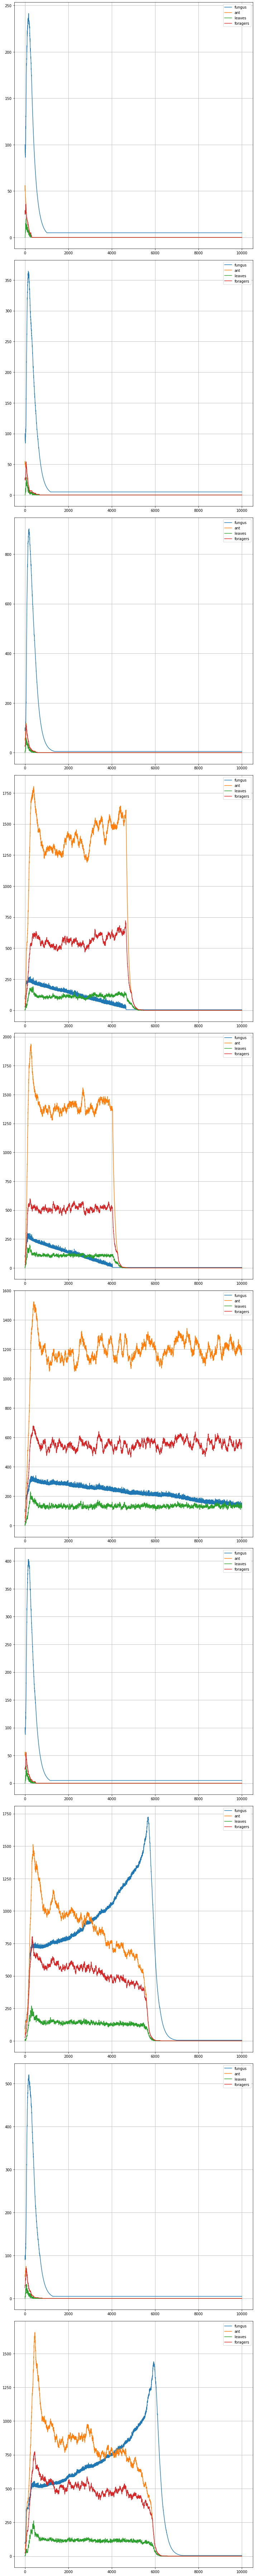

In [27]:
fig, axs = plt.subplots(repetitions, 1, figsize=(10,10*repetitions))

time = [t for t in range(max_steps+1)]
for i, key in enumerate(data.keys()):
    df = data[key]
    axs[i].plot(time, df['Fungus Biomass'], label='fungus')
    axs[i].plot(time, df['Ant Biomass'], label='ant')
    axs[i].plot(time, df['Ants with Leaves'], label='leaves')
    axs[i].plot(time, [f*a for f, a in zip(df['Fraction forager ants'], df['Ant Biomass'])], label='foragers')
    axs[i].legend()
    axs[i].grid()
# axs[0,0].set_title('Fungus Biomass')
# axs[0,1].set_title('Ant Biomass')
# axs[1,0].set_title('Ants with Leaves')
# axs[1,1].set_title('Fraction forager ants')
    
#     axs[0,0].set_ylim(4,5)
#     axs[0,0].set_xlim(0,500)

fig.tight_layout()
plt.show()